# UK Data Analysis Exercise

###### <b>

## Questions: 
##### - What Speed Limit Causes the Most Accidents 
##### - What is the Most Dangerous Time to Drive?
##### - What Year, Month Has the Highest Amount of Accidents?
##### - What Days of the week has more serious accidents?
##### - What Road and Light Conditions influence accidents?
##### - Are Fatal Accidents more common in Rural or Urban Areas?

#### <b>

### Import Modules

In [2]:
import pandas as pd
import os
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
from plotly.offline import iplot

cf.go_offline()
sns.set(style='darkgrid')
sns.set_palette('colorblind')

### Convert Excel to CSV reduce workload

In [3]:
#ukdata = pd.read_excel(r'/Users/danhosanee/Downloads/Dataset.xlsx')

In [4]:
#ukdata.to_csv('ukdata.csv', encoding='utf-8', index=False)

### Set Directory for Dict Folder

In [5]:
#Set current dir to dic data folder
os.chdir('/Users/danhosanee/Downloads/contextCSVs (accidents)')

In [6]:
ukData = pd.read_csv('ukdata.csv')

### Check the Data

In [7]:
ukData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570609 entries, 0 to 570608
Data columns (total 28 columns):
ID                                             570609 non-null int64
Location_Easting_OSGR                          570582 non-null float64
Location_Northing_OSGR                         570582 non-null float64
Longitude                                      570582 non-null float64
Latitude                                       570582 non-null float64
Police_Force                                   570609 non-null int64
Accident_Severity                              570609 non-null int64
Number_of_Vehicles                             570609 non-null int64
Number_of_Casualties                           570609 non-null int64
Date                                           570609 non-null object
Day_of_Week                                    570609 non-null int64
Time                                           570578 non-null object
Local_Authority_(District)                     5706

### Add Data Dictionary for Accident Severity to the DF

In [8]:
#Severity of Accident Caterogies
accsev_dic = pd.read_csv('Accident_Severity.csv')

#Merge accsev to UkData
ukData = ukData.merge(accsev_dic , how ='left', left_on=['Accident_Severity'], right_on=['code'])

#Rename label Column 
ukData = ukData.rename(columns={'label':'Accident_Severity_Label'})

#Test
ukData.sample(5)

,ID,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,code,Accident_Severity_Label
188231,188232,461648.0,432379.0,-1.065836,53.784089,12,3,1,1,2013-08-16,...,-1,0,0,0,4,1,2,E01027909,3,Slight
340162,340163,529974.0,409181.0,-0.039033,53.563143,16,3,1,1,2014-07-08,...,-1,0,0,0,1,1,2,E01013198,3,Slight
142283,142284,262610.0,669500.0,-4.198916,55.898998,97,3,2,2,2012-03-08,...,6,0,0,0,1,1,1,NaN,3,Slight
491775,491776,412430.0,288410.0,-1.818353,52.493461,20,3,2,2,2015-07-22,...,4,4114,0,5,1,1,1,E01009481,3,Slight
124744,124745,359210.0,168950.0,-2.587996,51.418037,52,2,1,1,2012-09-20,...,6,0,0,5,4,1,2,E01014607,2,Serious


## Speed Limit
#### What Speed Limit Causes the Most Accidents? 
###### - Highest No. Accidents occur at 30 Speed Limit 
###### - Highest Serious and Slight accidents occur at 30 Speed Limit
###### - Highest Fatal Accidents occur at roads with a 60 Speed Limit
###### <b>

In [95]:
#Create a Grouped DF comparing Speed Limit against Accident_Severity_Label
speed_gp = (ukData.groupby(['Accident_Severity_Label','Speed_limit'])['Accident_Severity_Label']
            .agg('count').unstack('Accident_Severity_Label').fillna(0))

#Highlight Max Values
speed_gp.style.highlight_max(color='red')

Accident_Severity_Label,Fatal,Serious,Slight
Speed_limit,,,
0,0,0,1
10,0,0,3
20,55,1890,10674
30,2214,47701,319183
40,636,7071,39518
50,448,3459,18075
60,2361,16193,61705
70,805,4925,33692


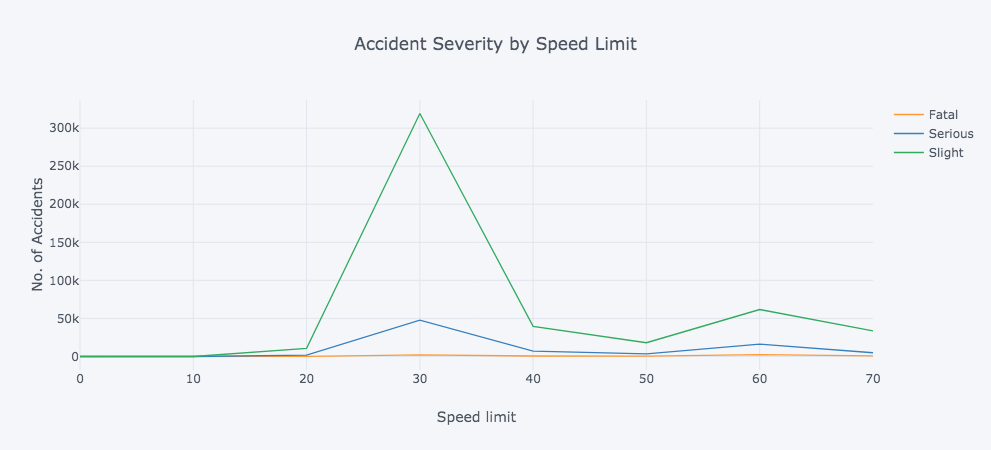

In [97]:
speed_gp.iplot(kind='line', title='Accident Severity by Speed Limit',xTitle='Speed limit', yTitle='No. of Accidents')

#### Seasonality: By Year, Weekday, Time of Day | Transform Data to relevant time periods


In [11]:
#Seasonality, Dict Data
dotw_dic = pd.read_csv('Day_of_Week.csv')

#Convert Date Object to Datetime 
ukData['Date'] = pd.to_datetime(ukData['Date'], format='%Y-%m-%d')
ukData['Time'] = pd.to_datetime(ukData['Time'], format='%H:%M:%S')

#Get the Year only from Date column
ukData['Year'] = ukData.Date.dt.year

#Get the Month only from Month Column
ukData['Month'] = ukData.Date.dt.strftime('%b')

#Get the Time in Hour by hours column covert to Int
ukData['Hour'] = ukData.Time.dt.hour.fillna(0).astype(int)

#Create an instance with the relevant columns to Analyse different seasonal Data
season = ukData[['ID','Date', 'Year', 'Month','Day_of_Week','Hour','Accident_Severity_Label']]

In [12]:
#Merge The Dictionary file with the Season Dataframe
season = (season.merge(dotw_dic, how ='left', left_on=['Day_of_Week'], right_on=['code'])
          .reindex(columns=['ID','Date', 'Year', 'Month','Day_of_Week','label','Hour','Accident_Severity_Label']))

season.sample(5)

,ID,Date,Year,Month,Day_of_Week,label,Hour,Accident_Severity_Label
552756,552757,2015-06-03,2015,Jun,4,Wednesday,1,Slight
185445,185446,2013-12-02,2013,Dec,2,Monday,7,Slight
283940,283941,2013-02-19,2013,Feb,3,Tuesday,13,Serious
233155,233156,2013-05-14,2013,May,3,Tuesday,16,Slight
217085,217086,2013-05-10,2013,May,6,Friday,16,Slight


In [13]:
#rename label column to Day
season =  season.rename(columns={"label":"Day"})
#Test
season.sample(3)

,ID,Date,Year,Month,Day_of_Week,Day,Hour,Accident_Severity_Label
385398,385399,2014-07-16,2014,Jul,4,Wednesday,11,Serious
287032,287033,2014-03-15,2014,Mar,7,Saturday,19,Slight
388279,388280,2014-06-04,2014,Jun,4,Wednesday,15,Slight


## Time
#### What is the Most Dangerous Time to Drive?
###### - 5pm is the Most dangerous time to Drive during the Day
###### - The two peaks in no. of Accidents occur at 8am and 5pm 

In [14]:
#Group Data ASL against Hours
seasongrphr = (season.groupby(['Accident_Severity_Label','Hour'])['Accident_Severity_Label']
               .count().unstack('Accident_Severity_Label'))
#View
seasongrphr.style.highlight_max(color='red')

Accident_Severity_Label,Fatal,Serious,Slight
Hour,,,
0,208,1500,6272
1,160,1125,4485
2,141,947,3468
3,133,820,2883
4,111,607,2455
5,148,940,3894
6,175,1763,8918
7,255,3482,21813
8,229,4783,37003


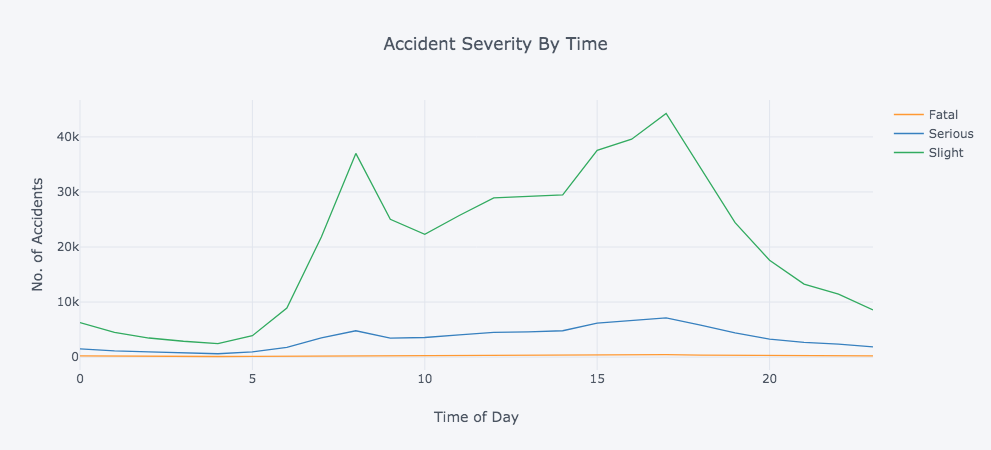

In [96]:
seasongrphr.iplot(kind='line', xTitle='Time of Day', yTitle='No. of Accidents', title='Accident Severity By Time')

## By Year
####  What Year Has the Highest Amount of Accidents?
###### - 2014 had the Most Accidents between 2012-2015
###### - 2013 had the Least Accidents between 2012-2015

In [16]:
#Group Data ASL against Year
seasongrpyear = (season.groupby(['Accident_Severity_Label','Year'])['ID'].agg('count')
                 .unstack('Accident_Severity_Label'))

#Highlight Max Values
seasongrpyear.style.highlight_max(color='yellow').highlight_min(color='lightgreen')

Accident_Severity_Label,Fatal,Serious,Slight
Year,,,
2012,1637,20901,123033
2013,1608,19624,117428
2014,1658,20676,123988
2015,1616,20038,118402


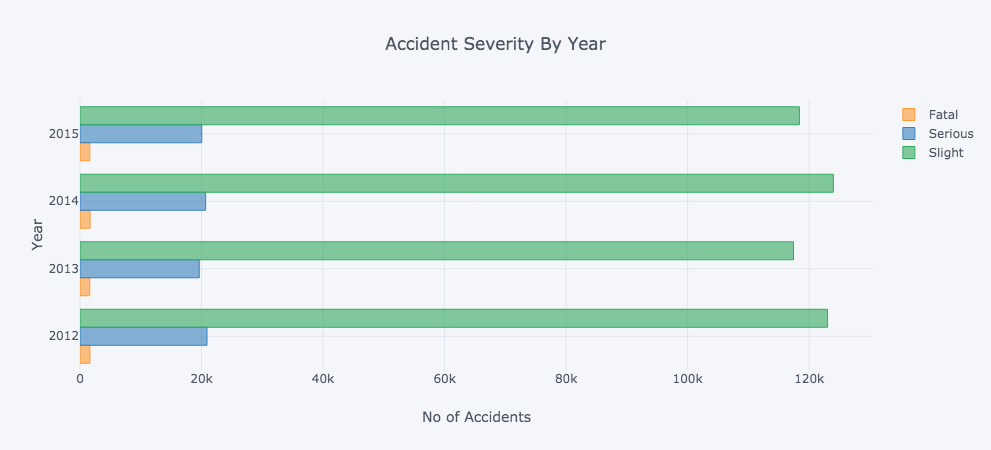

In [98]:
seasongrpyear.iplot(kind='barh', xTitle='No of Accidents', yTitle='Year',title='Accident Severity By Year')

## Per Month
#### What Months has the Highest no. of Accidents?
###### - Jul, Oct & Nov are the Months most accidents occur
###### - Highest No. of Fatal Accidents were in Dec
###### - Highest No. of Serious Accidents were in Jul
###### - Highest No. of Slight Accidents were in Oct

In [18]:
#Group ASL by Month
seasongrpmonth = (season.groupby(['Accident_Severity_Label','Month'])['ID'].agg('count')
                                  .unstack('Accident_Severity_Label')
                                  .reindex(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']))
#Highlight Max Values
seasongrpmonth.style.highlight_max(color='yellow')

Accident_Severity_Label,Fatal,Serious,Slight
Month,,,
Jan,505,6065,39179
Feb,433,5622,35593
Mar,488,6295,38526
Apr,501,6070,36093
May,550,7141,39941
Jun,530,7028,40345
Jul,583,7603,43441
Aug,570,7129,39531
Sep,564,7229,41318


In [42]:
#Group ASL and Month & Normalize by ASL
((pd.crosstab(season['Month'],season['Accident_Severity_Label'],normalize='columns')*100)
    .reindex(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']).style.format('{0:,.0f}%')
    .highlight_max(color='yellow'))

Accident_Severity_Label,Fatal,Serious,Slight
Month,,,
Jan,8%,7%,8%
Feb,7%,7%,7%
Mar,7%,8%,8%
Apr,8%,7%,7%
May,8%,9%,8%
Jun,8%,9%,8%
Jul,9%,9%,9%
Aug,9%,9%,8%
Sep,9%,9%,9%


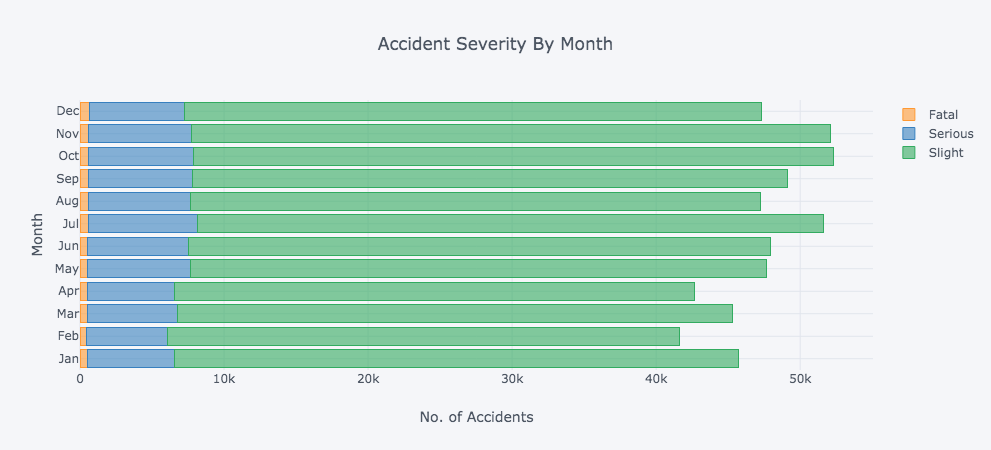

In [43]:
seasongrpmonth.iplot(kind='barh', barmode='stack',
                     title='Accident Severity By Month',
                     xTitle='No. of Accidents',
                     yTitle='Month')

### Per Day
#### What days of the week has more serious accidents?
###### - Highest volume of fatal accidents have occurred between Friday to Sunday, with the worst date being Saturday
###### - Friday has the highest no. of accidents

In [58]:
#Group ASL by Day
seasongrpday = (season.groupby(['Accident_Severity_Label','Day'])['Accident_Severity_Label'].agg('count')
                .unstack('Accident_Severity_Label').reindex(['Sunday','Monday','Tuesday','Wednesday',
                                                                  'Thursday','Friday','Saturday']))
#Highlight Max Values
seasongrpday.style.highlight_max(color='yellow')

Accident_Severity_Label,Fatal,Serious,Slight
Day,,,
Sunday,1041,10322,50545
Monday,848,11057,69961
Tuesday,853,11750,74064
Wednesday,823,11685,73528
Thursday,859,11862,74058
Friday,993,12950,78946
Saturday,1102,11613,61749


In [60]:
#Group Day by ASL then Normalize, Covert to % and Highlight Max % values
seasongrpdayPer=((pd.crosstab(season['Day'],season['Accident_Severity_Label'],normalize='columns')
     .reindex(['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])*100)
     .style.format('{0:,.0f}%')
     .highlight_max(color='yellow'))

seasongrpdayPer

Accident_Severity_Label,Fatal,Serious,Slight
Day,,,
Sunday,16%,13%,10%
Monday,13%,14%,14%
Tuesday,13%,14%,15%
Wednesday,13%,14%,15%
Thursday,13%,15%,15%
Friday,15%,16%,16%
Saturday,17%,14%,13%


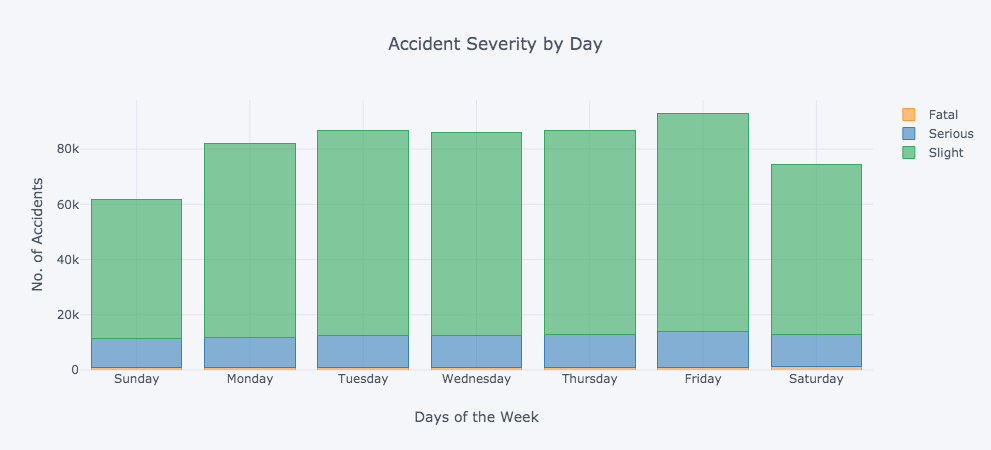

In [23]:
seasongrpday.iplot(kind='bar', barmode='stack',
                   title='Accident Severity by Day',
                   xTitle='Days of the Week',
                   yTitle='No. of Accidents')

## External Factors
#### What Road Types and Light Conditions influnce accidents?
###### - Single Carriageway Roads in  Daylight and Lights Lit conditions has the highest no. of accidents
###### - Single & Dual Carriageways and Roundabouts in Daylight or Lit conditions are the Top 3 in terms of accidents 
###### - Carriageways/Roundabout Road Types have a major influnce in no. of accidents


In [24]:
#External Factors Dict's Import
road_dic = pd.read_csv('Road_Type.csv')
light_dic = pd.read_csv('Light_Conditions.csv')

In [25]:
#Create an instance of the ukData and assign to ext_fac to reduce columns
ext_fac = ukData[['ID','Light_Conditions','Road_Type','Accident_Severity_Label']]
ext_fac.sample(5)

,ID,Light_Conditions,Road_Type,Accident_Severity_Label
352867,352868,1,6,Slight
120376,120377,1,6,Slight
70558,70559,6,6,Serious
394248,394249,1,6,Slight
450327,450328,1,6,Slight


In [26]:
#Merge Data with Road_Type Dic File
ext_fac = (ext_fac.merge(road_dic, how ='left', left_on=['Road_Type'], right_on=['code']))
ext_fac = ext_fac.rename(columns={'label':'Road'})
ext_fac.head()

,ID,Light_Conditions,Road_Type,Accident_Severity_Label,code,Road
0,1,4,6,Slight,6,Single carriageway
1,2,4,6,Slight,6,Single carriageway
2,3,1,2,Slight,2,One way street
3,4,1,6,Slight,6,Single carriageway
4,5,4,6,Slight,6,Single carriageway


In [27]:
#Merge Data with Light Conditions
ext_fac = (ext_fac.merge(light_dic, how='left', left_on=['Light_Conditions'], right_on=['code']))
ext_fac = ext_fac.rename(columns={'label':'Light'})
ext_fac.head()

,ID,Light_Conditions,Road_Type,Accident_Severity_Label,code_x,Road,code_y,Light
0,1,4,6,Slight,6,Single carriageway,4,Darkness - lights lit
1,2,4,6,Slight,6,Single carriageway,4,Darkness - lights lit
2,3,1,2,Slight,2,One way street,1,Daylight
3,4,1,6,Slight,6,Single carriageway,1,Daylight
4,5,4,6,Slight,6,Single carriageway,4,Darkness - lights lit


##### View the Dic Data for Road and Light Factors

In [28]:
#Create Instance with Columns being used for Groupby
ext_fac_fin = ext_fac.reindex(columns=['ID','Accident_Severity_Label','Road','Light'])
#Test
ext_fac_fin.head()

,ID,Accident_Severity_Label,Road,Light
0,1,Slight,Single carriageway,Darkness - lights lit
1,2,Slight,Single carriageway,Darkness - lights lit
2,3,Slight,One way street,Daylight
3,4,Slight,Single carriageway,Daylight
4,5,Slight,Single carriageway,Darkness - lights lit


In [81]:
#Group Road, Light against ASL
ext_fac_plt = pd.crosstab([ext_fac_fin['Road'],ext_fac_fin['Light']],ext_fac_fin['Accident_Severity_Label'],
                          margins=True, margins_name='Total')
ext_fac_plt.head(5)

Accident_Severity_Label                       Fatal  Serious  Slight  Total
Road             Light                                                     
Dual carriageway Darkness - lighting unknown     24      122     992   1138
                 Darkness - lights lit          274     2244   13623  16141
                 Darkness - lights unlit         17       83     469    569
                 Darkness - no lighting         305      993    4727   6025
                 Daylight                       638     6675   50226  57539

Text(0.5,1,'Accident Severity By External Factors')

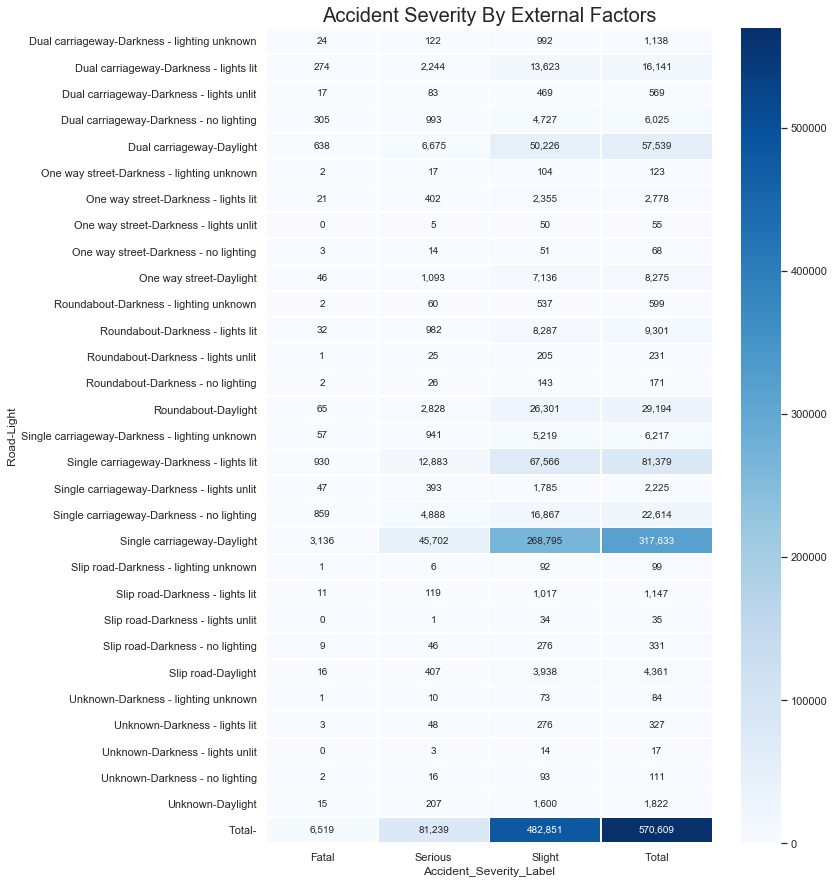

In [47]:
#Plot a HeatMap of Road,Light and ASL
f, ax = plt.subplots(figsize=(10, 15))
sns.heatmap(ext_fac_plt,cmap='Blues', annot=True, cbar=True, fmt='0,g', ax=ax, linewidths=0.5,vmax=570000) 
ax.set_title('Accident Severity By External Factors', loc='center',fontsize=20)

## Geographic
#### Are Fatal Accidents more common in Rural or Urban Areas?
##### - Fatal Accidents have occurred more in Rural than Urban Areas
##### - 64% of fatal accidents have occurred in Rural Areas

In [32]:
#Geography Dictionary assign to a variable
urban_rural_dic = pd.read_csv('Urban_Rural.csv')
urban_rural_dic.head(3)

,code,label
0,1,Urban
1,2,Rural
2,3,Unallocated


In [33]:
#Create an instance of ukData 
geo_area = ukData[['ID','Urban_or_Rural_Area','Accident_Severity_Label']]
#Test
geo_area.sample(5)

,ID,Urban_or_Rural_Area,Accident_Severity_Label
386912,386913,1,Slight
50442,50443,1,Slight
3065,3066,1,Slight
227653,227654,2,Slight
247309,247310,1,Slight


In [34]:
#Merge Data to Dic Values
geo_area = geo_area.merge(urban_rural_dic,how='left',left_on=['Urban_or_Rural_Area'], right_on=['code'])
#Test
geo_area.sample(5)

,ID,Urban_or_Rural_Area,Accident_Severity_Label,code,label
187765,187766,2,Slight,2,Rural
519801,519802,1,Slight,1,Urban
107770,107771,2,Slight,2,Rural
302732,302733,1,Slight,1,Urban
211723,211724,1,Serious,1,Urban


In [35]:
#Rename Label as Geography
geo_area = (geo_area.rename(columns={'label':'Geography'})
            .reindex(columns=['ID','Accident_Severity_Label','Geography']))

In [84]:
#Group ASL by Geography
geo_area_plt = pd.crosstab(geo_area['Geography'],geo_area['Accident_Severity_Label'],margins=False)
geo_area_plt

Accident_Severity_Label,Fatal,Serious,Slight
Geography,,,
Rural,4165,33546,159177
Urban,2354,47693,323674


In [85]:
#group ASL by Geo in % Terms based on ASL eg. 64% of fatal accidents are in rural areas
geo_area_plt_per = pd.crosstab(geo_area['Geography'],geo_area['Accident_Severity_Label'],normalize='columns')

#group ASL by Geo via Count
geo_area_plt = pd.crosstab(geo_area['Geography'],geo_area['Accident_Severity_Label'])


In [86]:
#View by Count
geo_area_plt.style.highlight_max(color='yellow')

Accident_Severity_Label,Fatal,Serious,Slight
Geography,,,
Rural,4165,33546,159177
Urban,2354,47693,323674


In [87]:
#ASL by Geo in % Terms based on ASL eg. 64% of fatal accidents are in rural areas
(geo_area_plt_per*100).style.format('{0:,.0f}%').highlight_max(color='yellow')

Accident_Severity_Label,Fatal,Serious,Slight
Geography,,,
Rural,64%,41%,33%
Urban,36%,59%,67%


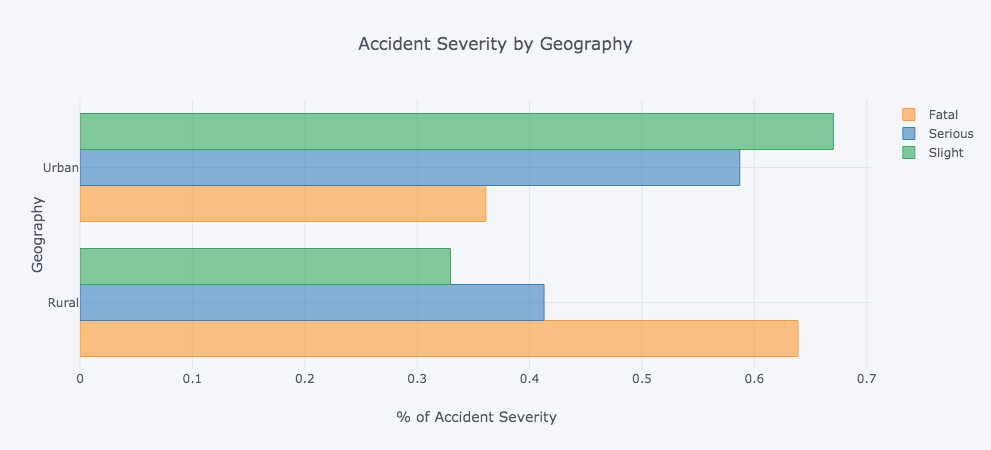

In [91]:
geo_area_plt_per.iplot(kind='barh',title='Accident Severity by Geography',xTitle='% of Accident Severity',yTitle='Geography')

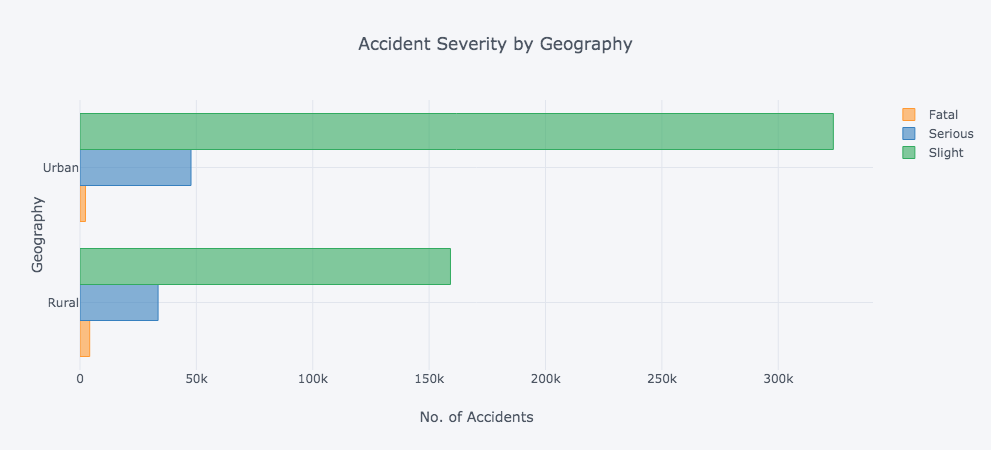

In [92]:
geo_area_plt.iplot(kind='barh',title='Accident Severity by Geography',xTitle='No. of Accidents',yTitle='Geography')